# What is Word2Vec?

**Word2Vec** is a popular technique in Natural Language Processing (NLP) used to represent words as numerical vectors in a way that captures their meanings, relationships, and contexts. It was developed by a team led by Tomas Mikolov at Google in 2013.

Here’s a **simple explanation**:

1. **Goal**: Word2Vec converts words into fixed-size vectors (lists of numbers) where words with similar meanings are closer together in the vector space. For example, "king" and "queen" will have similar vector representations.

2. **How it works**: Word2Vec is a neural network-based model trained on large text datasets. It uses two main approaches to learn word relationships:
   - **CBOW (Continuous Bag of Words)**: Predicts a word based on its surrounding words (context).
   - **Skip-gram**: Predicts the surrounding words (context) given a word.

3. **Output**: Each word is mapped to a high-dimensional vector, often in 100-300 dimensions, capturing semantic and syntactic information.

4. **Why it’s useful**:
   - Words with similar meanings appear near each other in the vector space.
   - Relationships like analogies can be represented mathematically. For example:
     ```
     vector("king") - vector("man") + vector("woman") ≈ vector("queen")
     ```

5. **Applications**:
   - Text classification
   - Machine translation
   - Question-answering systems
   - Sentiment analysis

In essence, Word2Vec helps machines "understand" the relationships between words by embedding them in a mathematical space.

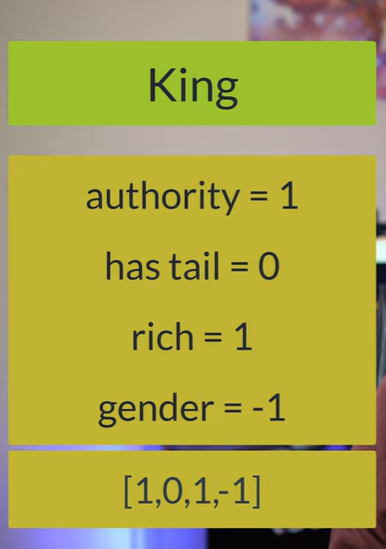

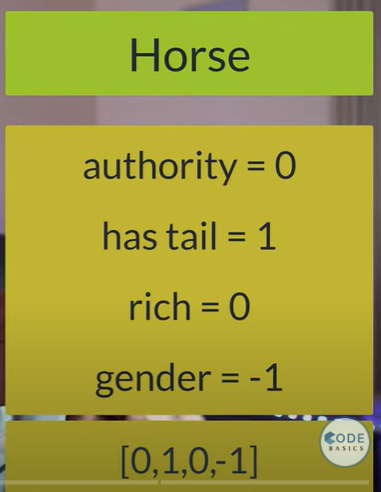

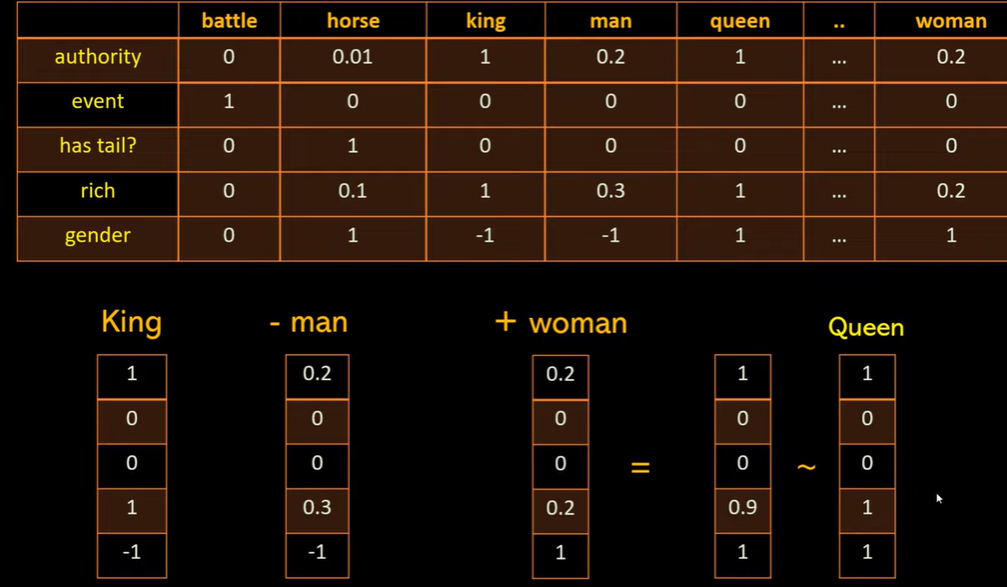

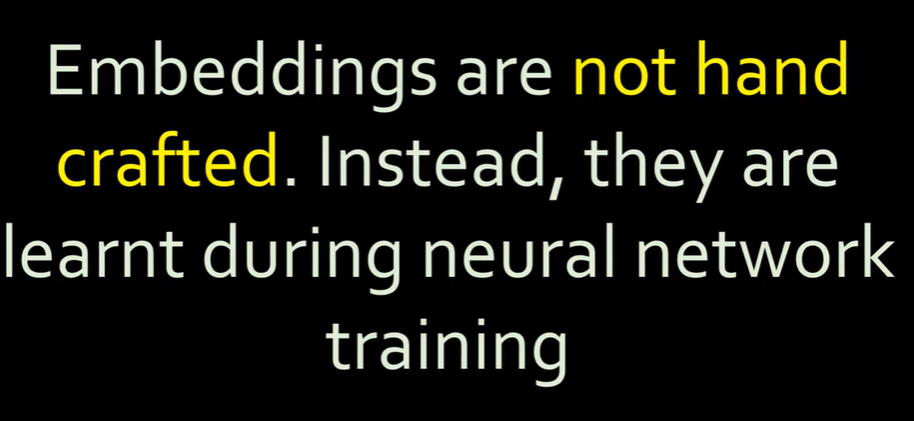

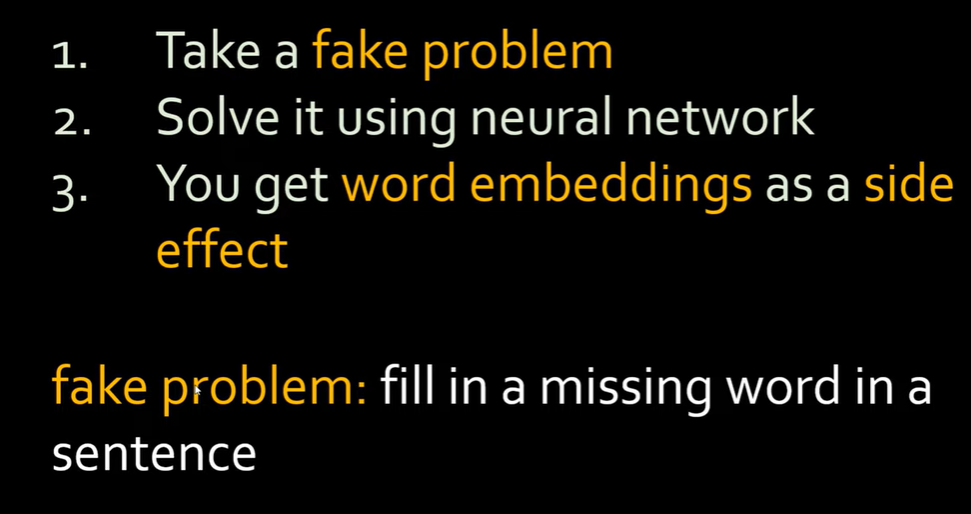

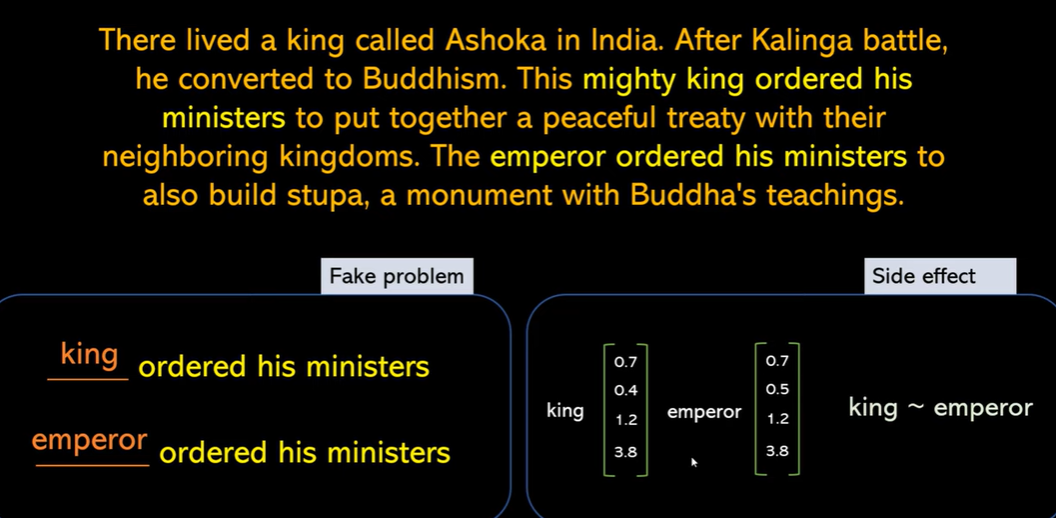

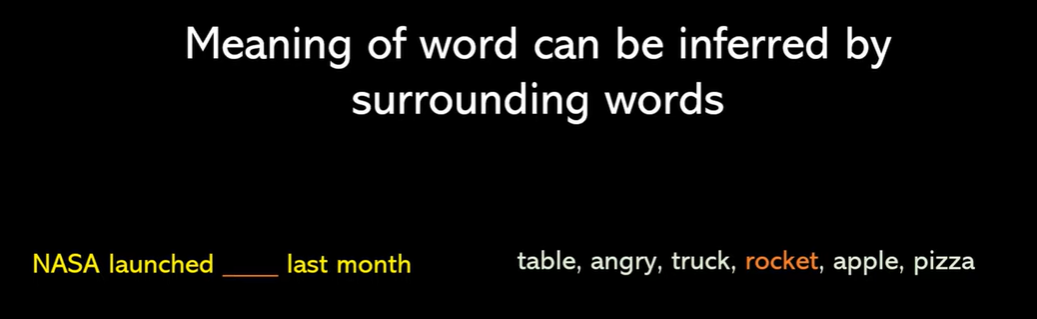

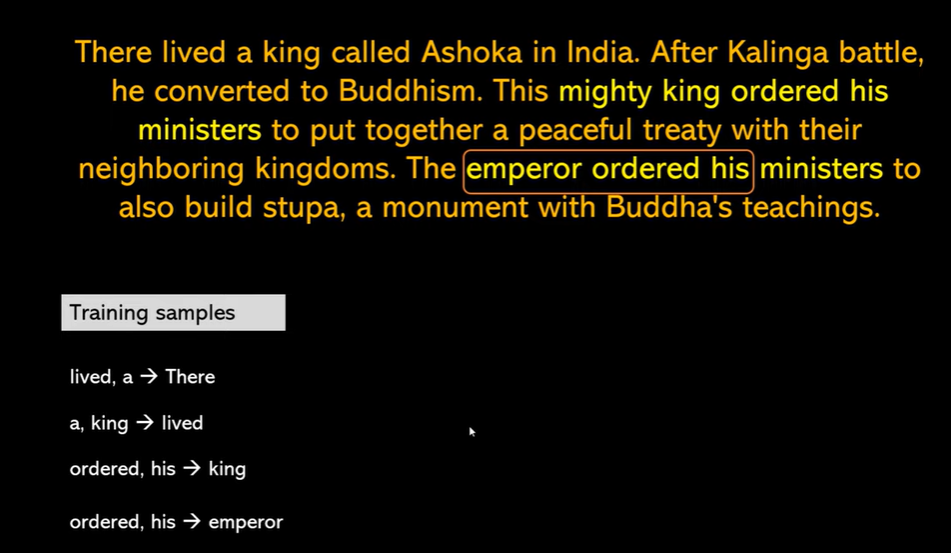

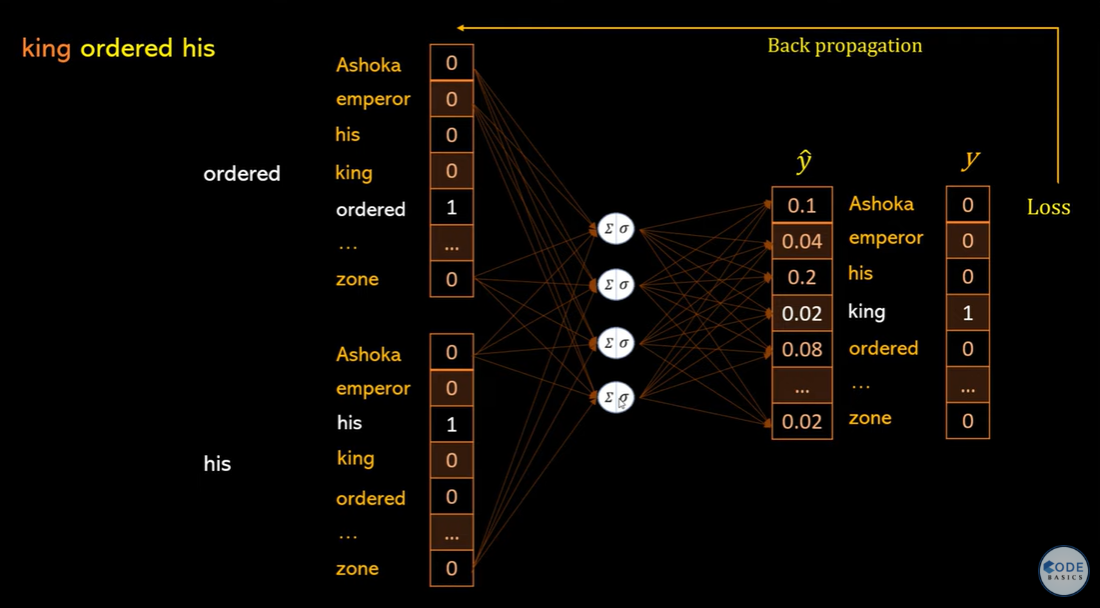

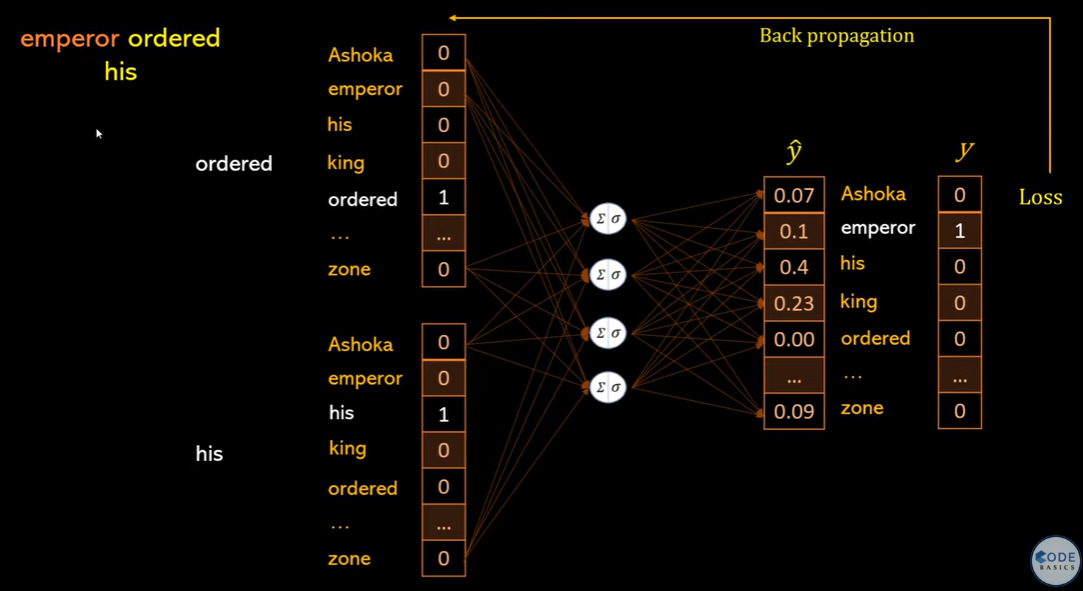

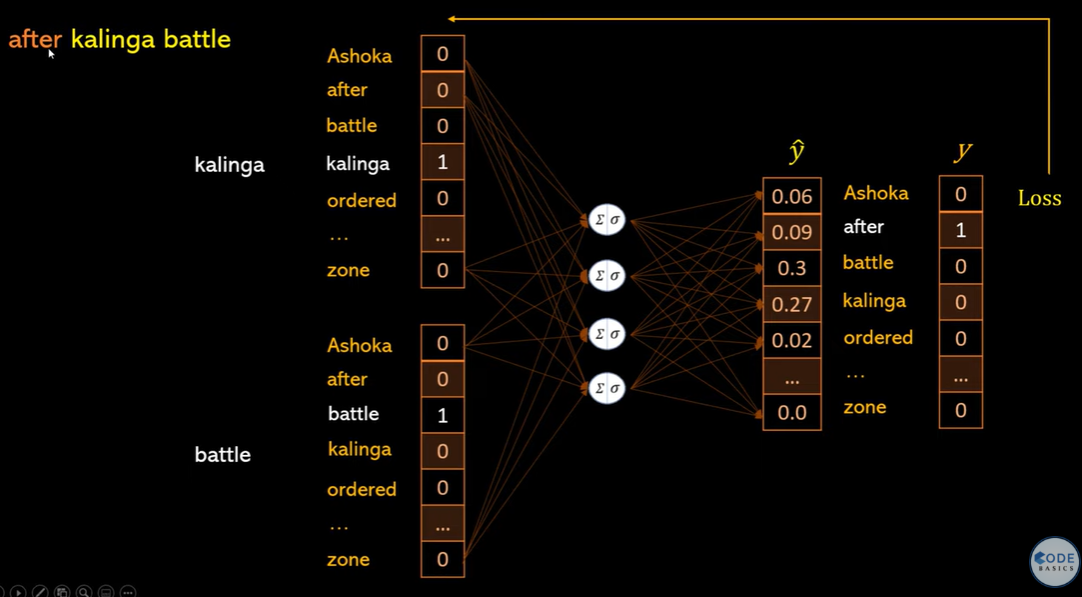

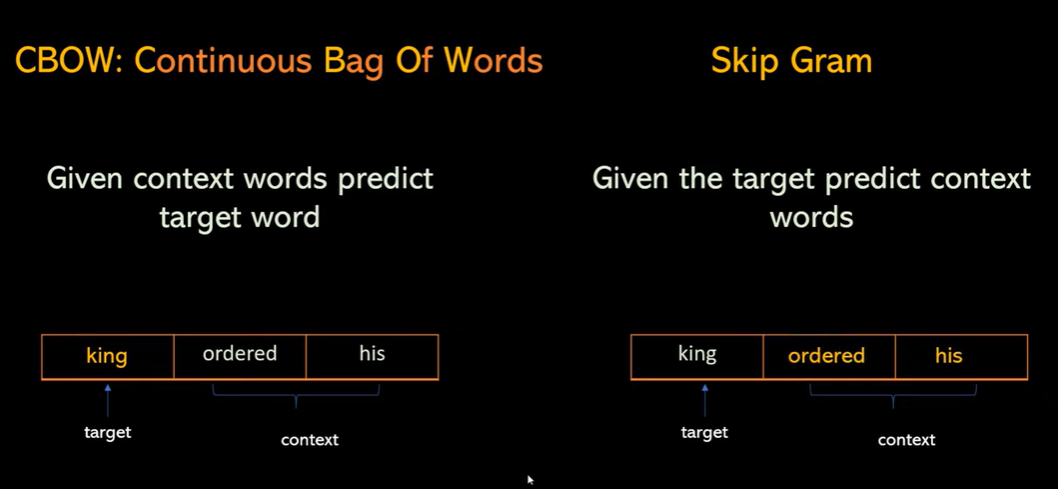

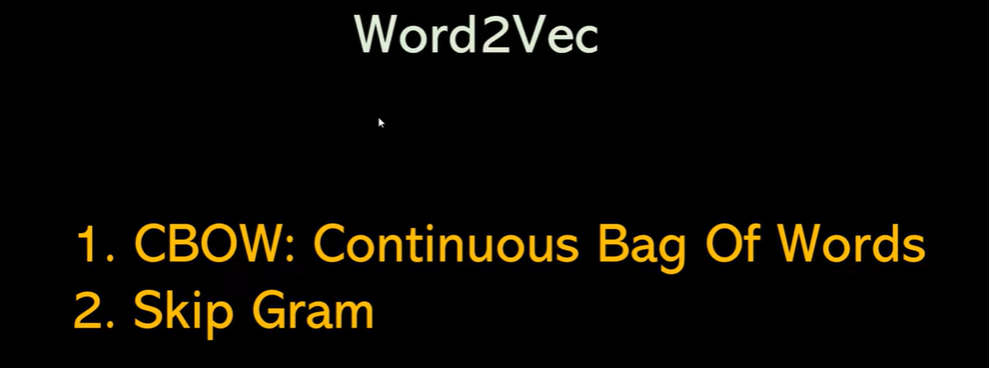

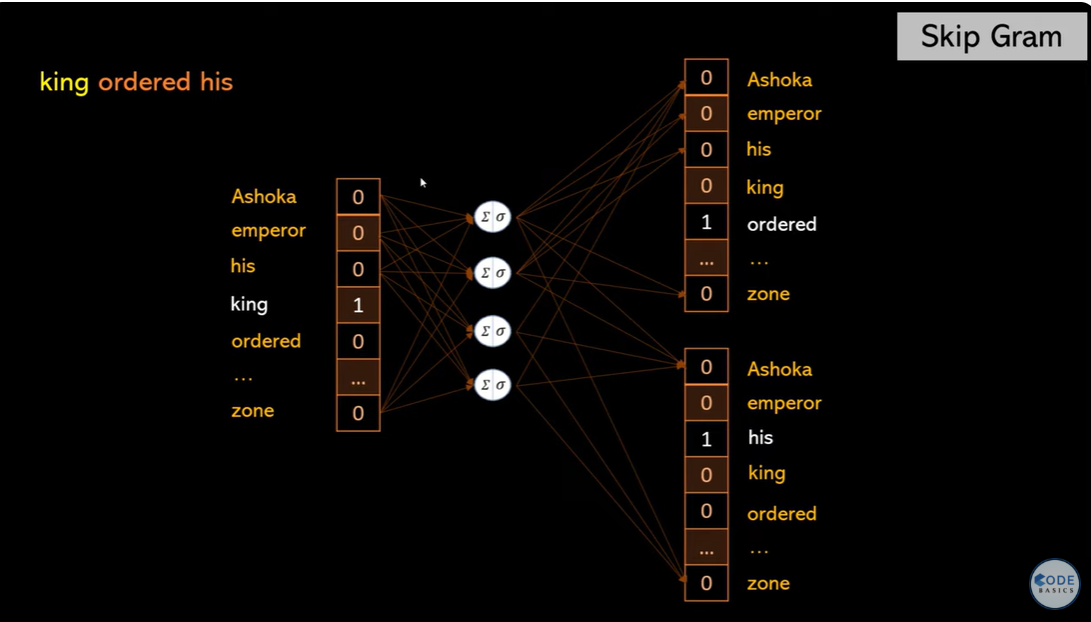

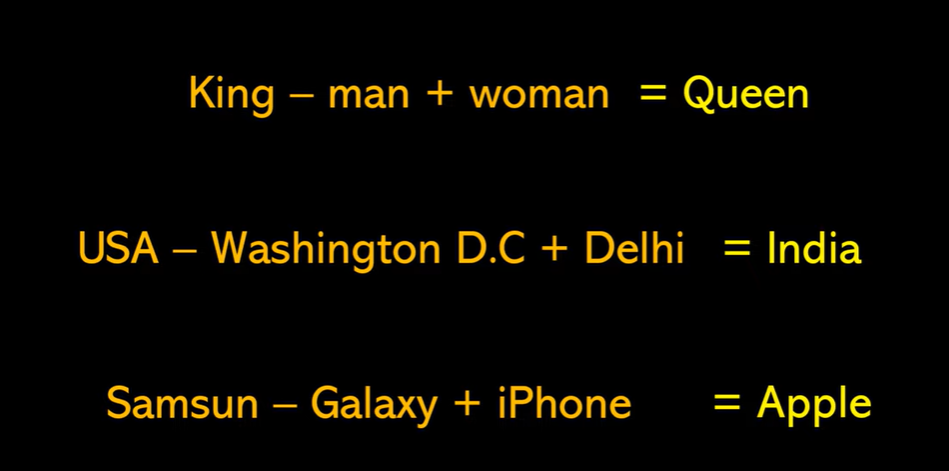

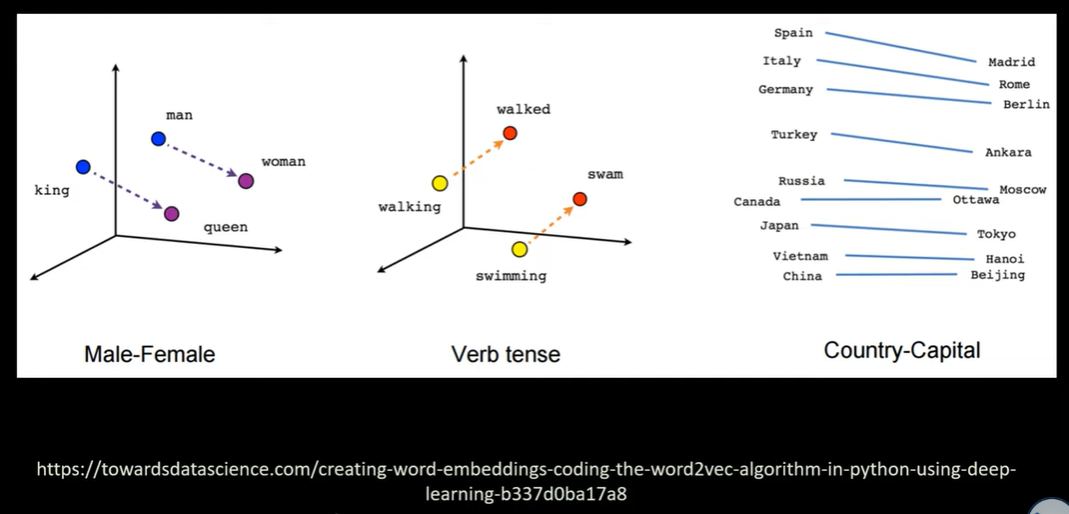

In [ ]:
!pip install gensim
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.8 MB/s eta 0:00:00


In [1]:
import gensim
import pandas as pd

# Reading and Exploring the Dataset

The dataset we are using here is a subset of Amazon reviews from the Cell Phones & Accessories category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [2]:
df = pd.read_json("Cell_Phones_and_Accessories_5.json", lines=True)
df

reviewerID        asin       reviewerName helpful  \
0       A30TL5EWN6DFXT  120401325X          christina  [0, 0]   
1        ASY55RVNIL0UD  120401325X           emily l.  [0, 0]   
2       A2TMXE2AFO7ONB  120401325X              Erica  [0, 0]   
3        AWJ0WZQYMYFQ4  120401325X                 JM  [4, 4]   
4        ATX7CZYFXI1KW  120401325X   patrice m rogoza  [2, 3]   
...                ...         ...                ...     ...   
194434  A1YMNTFLNDYQ1F  B00LORXVUE    eyeused2loveher  [0, 0]   
194435  A15TX8B2L8B20S  B00LORXVUE       Jon Davidson  [0, 0]   
194436  A3JI7QRZO1QG8X  B00LORXVUE  Joyce M. Davidson  [0, 0]   
194437  A1NHB2VC68YQNM  B00LORXVUE     Nurse Farrugia  [0, 0]   
194438  A1AG6U022WHXBF  B00LORXVUE     Trisha Crocker  [0, 0]   

                                               reviewText  overall  \
0       They look good and stick good! I just don't li...        4   
1       These stickers work like the review says they ...        5   
2       These are awesome and make my phone look so st...        5   
3       Item arrived in great time and was in perfect ...        4   
4       awesome! stays on, and looks great. can be use...        5   
...                                                   ...      ...   
194434  Works great just like my original one. I reall...        5   
194435  Great product. Great packaging. High quality a...        5   
194436  This is a great cable, just as good as the mor...        5   
194437  I really like it becasue it works well with my...        5   
194438  product as described, I have wasted a lot of m...        5   

                                                  summary  unixReviewTime  \
0                                              Looks Good      1400630400   
1                                   Really great product.      1389657600   
2                                          LOVE LOVE LOVE      1403740800   
3                                                   Cute!      1382313600   
4               leopard home button sticker for iphone 4s      1359849600   
...                                                   ...             ...   
194434                           This works just perfect!      1405900800   
194435           Great replacement cable. Apple certified      1405900800   
194436                                       Real quality      1405900800   
194437  I really like it becasue it works well with my...      1405814400   
194438              I have wasted a lot of money on cords      1405900800   

         reviewTime  
0       05 21, 2014  
1       01 14, 2014  
2       06 26, 2014  
3       10 21, 2013  
4        02 3, 2013  
...             ...  
194434  07 21, 2014  
194435  07 21, 2014  
194436  07 21, 2014  
194437  07 20, 2014  
194438  07 21, 2014  

[194439 rows x 9 columns]

In [3]:
df.shape

(194439, 9)

# Simple Preprocessing & Tokenization

The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [4]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [5]:
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [6]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [7]:
df.reviewText.loc[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

# Training the Word2Vec Model

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

# Initialize the model

In [8]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

# Build Vocabulary

In [9]:
model.build_vocab(review_text, progress_per=1000)

# Train the Word2Vec Model

In [10]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61509607, 83868975)

# Save the Model

Save the model so that it can be reused in other applications

In [11]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

# Finding Similar Words and Similarity between words

https://radimrehurek.com/gensim/models/word2vec.html

In [12]:
model.wv.most_similar("bad")

[('shabby', 0.7050225734710693),
 ('terrible', 0.6852337718009949),
 ('horrible', 0.5984529256820679),
 ('good', 0.5899423956871033),
 ('awful', 0.5659842491149902),
 ('legit', 0.5335667729377747),
 ('okay', 0.5223283171653748),
 ('sad', 0.5218895077705383),
 ('mad', 0.5151151418685913),
 ('poor', 0.510675847530365)]

In [13]:
model.wv.similarity(w1="cheap", w2="inexpensive")

0.5282123

In [14]:
model.wv.similarity(w1="great", w2="good")

0.778283

# Further Reading

You can read about gensim more at https://radimrehurek.com/gensim/models/word2vec.html

Explore other Datasets related to Amazon Reviews: http://jmcauley.ucsd.edu/data/amazon/

# Exercise
Train a word2vec model on the Sports & Outdoors Reviews Dataset Once you train a model on this, find the words most similar to 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')

In [15]:
import gensim
import pandas as pd

# Reading and Exploring the Dataset
The dataset we are using here is a subset of Amazon reviews from the Sports & Outdoors category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz

In [16]:
df1 = pd.read_json("/content/Sports_and_Outdoors_5.json", lines=True)
df1

reviewerID        asin  \
0         AIXZKN4ACSKI  1881509818   
1       A1L5P841VIO02V  1881509818   
2        AB2W04NI4OEAD  1881509818   
3       A148SVSWKTJKU6  1881509818   
4        AAAWJ6LW9WMOO  1881509818   
...                ...         ...   
296332  A2XX2A4OJCDNLZ  B00LFPS0CY   
296333  A3LGT6UZL99IW1  B00LFPS0CY   
296334   ASKZO80Z1RKTR  B00LFPS0CY   
296335   APRNS6DB68LLV  B00LFPS0CY   
296336  A3UJRNI8UR4871  B00LFPS0CY   

                                            reviewerName helpful  \
0                                           David Briner  [0, 0]   
1                                        Jason A. Kramer  [1, 1]   
2                                             J. Fernald  [2, 2]   
3                         Jusitn A. Watts "Maverick9614"  [0, 0]   
4                                           Material Man  [0, 0]   
...                                                  ...     ...   
296332                               RatherLiveInKeyWest  [2, 3]   
296333  Richard C. Drew "Anaal Nathra/Uthe vas Bethod...  [0, 0]   
296334                                         Robin Lee  [0, 0]   
296335                  Rob Slaven "slavenrm@gmail. com"  [1, 1]   
296336                               Wulfstan "wulfstan"  [2, 2]   

                                               reviewText  overall  \
0       This came in on time and I am veru happy with ...        5   
1       I had a factory Glock tool that I was using fo...        5   
2       If you don't have a 3/32 punch or would like t...        4   
3       This works no better than any 3/32 punch you w...        4   
4       I purchased this thinking maybe I need a speci...        4   
...                                                   ...      ...   
296332  This is a water bottle done right. It is a ver...        5   
296333  If you're looking for an insulated water bottl...        5   
296334  This Hydracentials Sporty 25 OZ, double insula...        5   
296335  As usual I received this item free in exchange...        5   
296336  Hydracentials insulated 25 oz water bottle.Thi...        5   

                                                  summary  unixReviewTime  \
0                                          Woks very good      1390694400   
1                       Works as well as the factory tool      1328140800   
2                               It's a punch, that's all.      1330387200   
3                         It's a punch with a Glock logo.      1328400000   
4                 Ok,tool does what a regular punch does.      1366675200   
...                                                   ...             ...   
296332  Hydracentials Sporty 25 Oz Stainless Steel Wat...      1405036800   
296333          Large, incredibly well made water bottle!      1405641600   
296334             "Great Water Bottle For Hot Day"......      1405900800   
296335  A pretty impressive water bottle.  Best I've s...      1405900800   
296336                                     "Cool" Bottle!      1405382400   

         reviewTime  
0       01 26, 2014  
1        02 2, 2012  
2       02 28, 2012  
3        02 5, 2012  
4       04 23, 2013  
...             ...  
296332  07 11, 2014  
296333  07 18, 2014  
296334  07 21, 2014  
296335  07 21, 2014  
296336  07 15, 2014  

[296337 rows x 9 columns]

In [17]:
df1.shape

(296337, 9)

# Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [18]:
review_text_1= df1.reviewText.apply(gensim.utils.simple_preprocess)

In [19]:
review_text_1

0         [this, came, in, on, time, and, am, veru, happ...
1         [had, factory, glock, tool, that, was, using, ...
2         [if, you, don, have, punch, or, would, like, t...
3         [this, works, no, better, than, any, punch, yo...
4         [purchased, this, thinking, maybe, need, speci...
                                ...                        
296332    [this, is, water, bottle, done, right, it, is,...
296333    [if, you, re, looking, for, an, insulated, wat...
296334    [this, hydracentials, sporty, oz, double, insu...
296335    [as, usual, received, this, item, free, in, ex...
296336    [hydracentials, insulated, oz, water, bottle, ...
Name: reviewText, Length: 296337, dtype: object

In [20]:
review_text_1.loc[0]

['this',
 'came',
 'in',
 'on',
 'time',
 'and',
 'am',
 'veru',
 'happy',
 'with',
 'it',
 'haved',
 'used',
 'it',
 'already',
 'and',
 'it',
 'makes',
 'taking',
 'out',
 'the',
 'pins',
 'in',
 'my',
 'glock',
 'very',
 'easy']

In [21]:
df1.reviewText.loc[0]

'This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy'

# Training the Word2Vec Model
Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

# Initialize the model

In [22]:
model_1 = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

# Build Vocabulary

In [23]:
model_1.build_vocab(review_text_1, progress_per=1000)

# Train the Word2Vec Model

In [24]:
model_1.train(review_text_1, total_examples=model_1.corpus_count, epochs=model_1.epochs)

(91344361, 121496535)

# Finding Similar Words and Similarity between words
https://radimrehurek.com/gensim/models/word2vec.html

In [25]:
model_1.wv.most_similar("awful")

[('horrible', 0.7364753484725952),
 ('terrible', 0.683092474937439),
 ('ugly', 0.6192647218704224),
 ('unpleasant', 0.5786200761795044),
 ('overpowering', 0.5747221112251282),
 ('funny', 0.5584496855735779),
 ('icky', 0.5514554381370544),
 ('unacceptable', 0.5341309905052185),
 ('enormous', 0.530877947807312),
 ('sucks', 0.526838481426239)]

In [26]:
model_1.wv.similarity(w1="good", w2="great")

0.786659

In [27]:
model_1.wv.similarity(w1="slow", w2="steady")

0.35438547